# Data Visualization 

In [33]:
import matplotlib.pyplot as plt
# This is a standard import of matplotlib

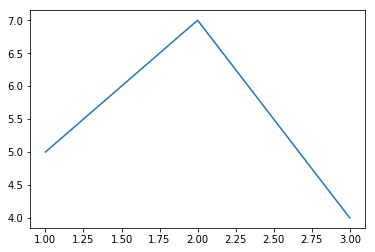

In [34]:
# A simple plot from matplotlib
plt.plot([1,2,3],[5,7,4])

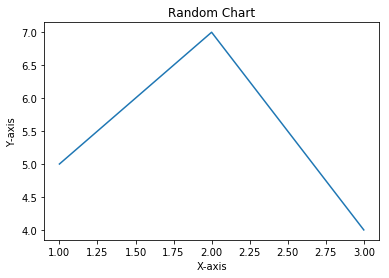

In [35]:
# Let's add titles on this plot
plt.plot([1,2,3],[5,7,4])
plt.xlabel("X-axis") # Label for x axis
plt.ylabel("Y-axis") # Label for y axis
plt.title("Random Chart") # Chart Title
plt.show()

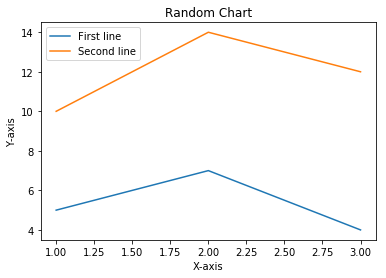

In [36]:
# We can add legend to this chart as well. let's plot 2 lines now
plt.plot([1,2,3],[5,7,4], label = "First line") # label is just what is going to appear on the legend.
plt.plot([1,2,3],[10,14,12], label = "Second line")
plt.xlabel("X-axis") # Label for x axis
plt.ylabel("Y-axis") # Label for y axis
plt.title("Random Chart") # Chart Title
plt.legend() # This is going to invoke and legend
plt.show()

## Bar Charts

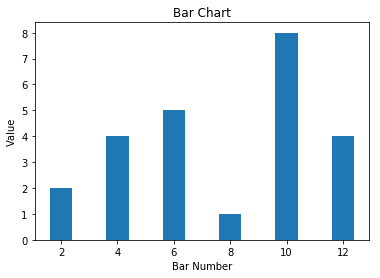

In [37]:
plt.bar([2,4,6,8,10,12],[2,4,5,1,8,4]) # single bar chart
plt.xlabel("Bar Number") # Label for x axis
plt.ylabel("Value") # Label for y axis
plt.title("Bar Chart") # Chart Title
#plt.legend() # This is going to invoke and legend
plt.show()

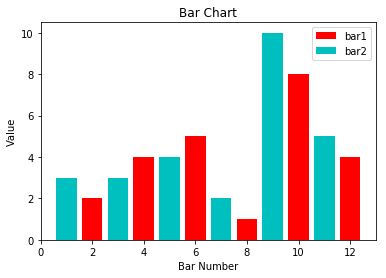

In [38]:
# Bar chart for 2 tables. Bar charts are usually used to compare 2 columns of values.
plt.bar([2,4,6,8,10,12],[2,4,5,1,8,4], label = "bar1", color = "r")
plt.bar([1,3,5,7,9,11],[3,3,4,2,10,5], label = "bar2", color = "c")

plt.xlabel("Bar Number") # Label for x axis
plt.ylabel("Value") # Label for y axis
plt.title("Bar Chart") # Chart Title
plt.legend() # This is going to invoke and legend
plt.show()

## Histograms
Histograms are used to show the distribution of a variable

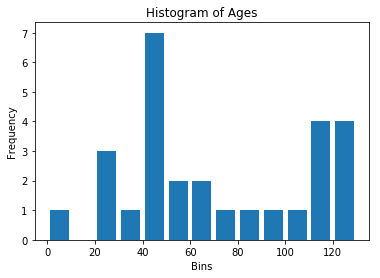

In [39]:
# Let's we have array of people age in a survey.
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115,112,80,75,65,54,44,43,42,48]

# Now we wants to see the distribution of age. We first need to create bins for this variable.
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130]

plt.hist(population_ages, bins, histtype = "bar",rwidth = 0.8) # histtype is for what kind of histogram we want.
# rwidth is the width of the bar. We make it a little less than 1 so they wont collide.
plt.xlabel("Bins") # Label for x axis
plt.ylabel("Frequency") # Label for y axis
plt.title("Histogram of Ages") # Chart Title
# plt.legend() # This is going to invoke and legend
plt.show()

## Scatter Plot
Scatter plots are usually used to see relationship between 2 variables

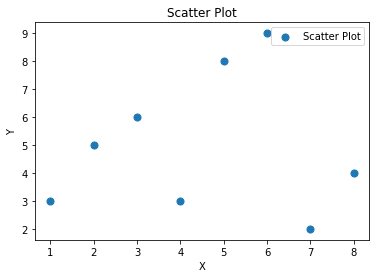

In [40]:
x = [1,2,3,4,5,6,7,8]
y = [3,5,6,3,8,9,2,4]

plt.scatter(x,y, label = "Scatter Plot", s = 50) # s stands for size. we can also change the marker by using marker argument.
plt.xlabel("X") # Label for x axis
plt.ylabel("Y") # Label for y axis
plt.title("Scatter Plot") # Chart Title
plt.legend() # This is going to invoke and legend
plt.show()

## Stack Plot
Stack plot are used to show the contribution of each "part of a whole" over time.

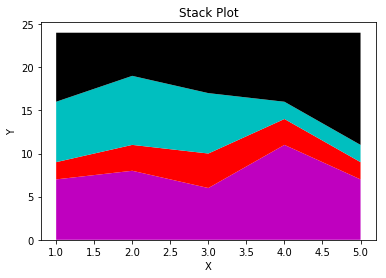

In [41]:
days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

plt.stackplot(days, sleeping, eating, working, playing, colors = ["m","r","c","k"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Stack Plot")
plt.show()

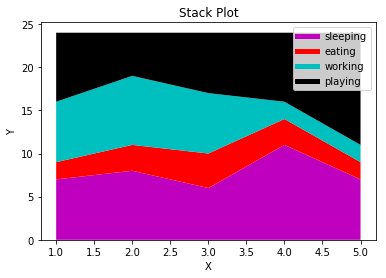

In [42]:
# The stackplot does not producea legend which is necessary in the stack plot. So we will find another way to do that.
days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

plt.plot([],[], color = "m", label = "sleeping", linewidth = 5)
plt.plot([],[], color = "r", label = "eating", linewidth = 5)
plt.plot([],[], color = "c", label = "working", linewidth = 5)
plt.plot([],[], color = "k", label = "playing", linewidth = 5)

plt.stackplot(days, sleeping, eating, working, playing, colors = ["m","r","c","k"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Stack Plot")
plt.legend()
plt.show()

## Pie charts

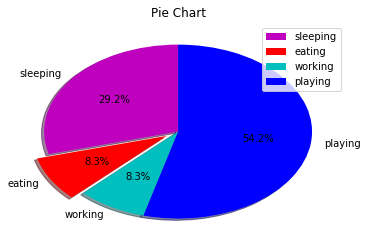

In [43]:
slices = [7,2,2,13] # Values that will decide the size of pies.
activities = ["sleeping","eating","working","playing"]

plt.pie(slices, labels = activities, colors = ["m","r","c","b"], 
        autopct = "%1.1f%%", # autopct for adding percentages in slices.
        shadow = True,
        startangle = 90, # The angle at which the pie starts adding slices
        explode = [0,0.1,0,0]) # explode will take slice out of the pie for more attention.
plt.title("Pie Chart")
plt.legend()
plt.show()

## Reading data from a file and plotting

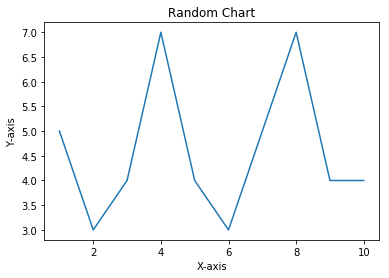

In [44]:
# Now we will look at how to read data from an external file and use it plot data.
# We are going to use csv module for that.
import csv

x = []
y = []

with open("/Users/atyagi/Desktop/Python Tutorials/Data-Analysis-in-Python/Dataset/example.txt","r") as csv_file:
    plots = csv.reader(csv_file, delimiter = ",")
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))

plt.plot(x,y)
plt.xlabel("X-axis") # Label for x axis
plt.ylabel("Y-axis") # Label for y axis
plt.title("Random Chart") # Chart Title
plt.show()

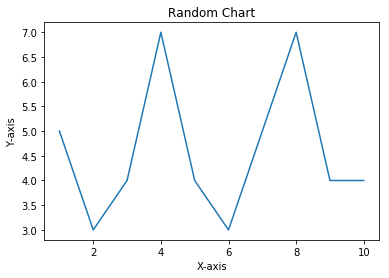

In [45]:
# Another easier way of doing that is to use numpy loadtxt.
import numpy as np
x,y = np.loadtxt("/Users/atyagi/Desktop/Python Tutorials/Data-Analysis-in-Python/Dataset/example.txt",
                delimiter = ",", unpack = True)

plt.plot(x,y)
plt.xlabel("X-axis") # Label for x axis
plt.ylabel("Y-axis") # Label for y axis
plt.title("Random Chart") # Chart Title
plt.show()

## Reading data from internet and plotting

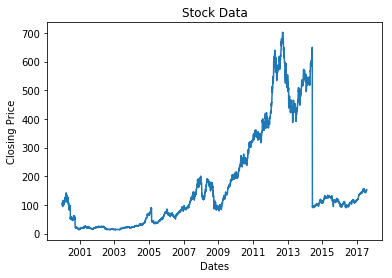

In [46]:
# Reading data from internet and using for plots.
import urllib
import matplotlib.dates as mdates

# Function for converting the datestamps to time that matplolib understands.
def bytespdate2num(fmt, encoding = "utf-8"):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    stock_price_url = "https://pythonprogramming.net/yahoo_finance_replacement"
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split("\n")
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter = ",",
                                                                     unpack = True,                                                                 # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                                     converters = {0:bytespdate2num("%Y-%m-%d")})

    plt.plot_date(date, closep, '-')
    plt.xlabel("Dates") # Label for x axis
    plt.ylabel("Closing Price") # Label for y axis
    plt.title("Stock Data") # Chart Title
    plt.show()
    
graph_data("TSLA")

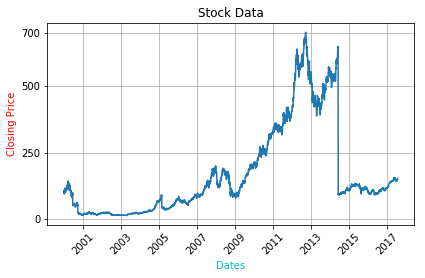

In [57]:
# Now we are will learn some more customization of the chart.
# Reading data from internet and using for plots.
import urllib
import matplotlib.dates as mdates

# Function for converting the datestamps to time that matplolib understands.
def bytespdate2num(fmt, encoding = "utf-8"):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    stock_price_url = "https://pythonprogramming.net/yahoo_finance_replacement"
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split("\n")
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter = ",",
                                                                     unpack = True,                                                                 # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                                     converters = {0:bytespdate2num("%Y-%m-%d")})
    # In case we have unix time which is count of seconds from july 1970. We don't need the converters argument.
    # Instead of that we can do something like
    #dateconv = np.vectorize(dt.datetime.fromtimestamp)
    #date = dateconv(date)

    plt.plot_date(date, closep, '-')
    plt.xlabel("Dates", color = "c") # Label for x axis
    plt.ylabel("Closing Price",color = "r") # Label for y axis
    plt.xticks(rotation = 45) # rotate the x axis labels
    plt.yticks([0,250,500,700])# Numbers to be shown on the Y-axis.
    plt.grid(True) #grid lines in the plot
    plt.title("Stock Data") # Chart Title
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90)
    plt.show()
    
graph_data("EBAY")

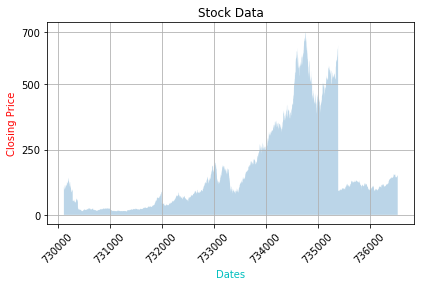

In [59]:
# Now we are will learn some more customization of the chart.
# Reading data from internet and using for plots.
import urllib
import matplotlib.dates as mdates

# Function for converting the datestamps to time that matplolib understands.
def bytespdate2num(fmt, encoding = "utf-8"):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    stock_price_url = "https://pythonprogramming.net/yahoo_finance_replacement"
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split("\n")
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter = ",",
                                                                     unpack = True,                                                                 # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                                     converters = {0:bytespdate2num("%Y-%m-%d")})
    # In case we have unix time which is count of seconds from july 1970. We don't need the converters argument.
    # Instead of that we can do something like
    #dateconv = np.vectorize(dt.datetime.fromtimestamp)
    #date = dateconv(date)
    # In case we don't wants to plot the line and wants to fill the chart. We can do it using fill_between.
    #plt.plot_date(date, closep, '-')
    plt.fill_between(date,closep, 0, alpha = 0.3) # alpha is used to color the shading.
    plt.xlabel("Dates", color = "c") # Label for x axis
    plt.ylabel("Closing Price",color = "r") # Label for y axis
    plt.xticks(rotation = 45) # rotate the x axis labels
    plt.yticks([0,250,500,700])# Numbers to be shown on the Y-axis.
    plt.grid(True) #grid lines in the plot
    plt.title("Stock Data") # Chart Title
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90)
    plt.show()
    
graph_data("EBAY")

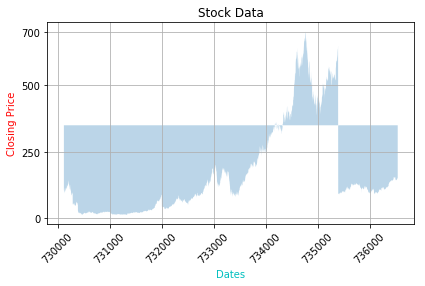

In [61]:
# Conditional fills. 
#Let's assume the start the graph is where we started buying into eBay. 
#From here, if the price goes below this price, we can fill up to the original price 
# and then if it goes above, we can fill below. We can do that by passing that value in fill_between().
def bytespdate2num(fmt, encoding = "utf-8"):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    stock_price_url = "https://pythonprogramming.net/yahoo_finance_replacement"
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split("\n")
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter = ",",
                                                                     unpack = True,                                                                 # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                                     converters = {0:bytespdate2num("%Y-%m-%d")})
    # In case we have unix time which is count of seconds from july 1970. We don't need the converters argument.
    # Instead of that we can do something like
    #dateconv = np.vectorize(dt.datetime.fromtimestamp)
    #date = dateconv(date)
    # In case we don't wants to plot the line and wants to fill the chart. We can do it using fill_between.
    #plt.plot_date(date, closep, '-')
    plt.fill_between(date,closep, 350, alpha = 0.3) # alpha is used to color the shading.
    plt.xlabel("Dates", color = "c") # Label for x axis
    plt.ylabel("Closing Price",color = "r") # Label for y axis
    plt.xticks(rotation = 45) # rotate the x axis labels
    plt.yticks([0,250,500,700])# Numbers to be shown on the Y-axis.
    plt.grid(True) #grid lines in the plot
    plt.title("Stock Data") # Chart Title
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90)
    plt.show()
    
graph_data("EBAY")

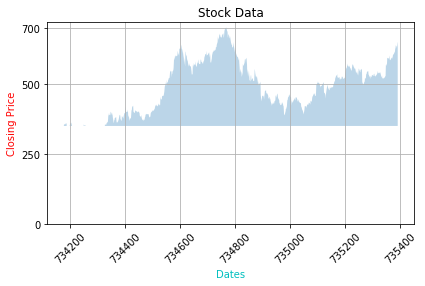

In [62]:
# Conditional fills. 
# Let's assume the start the graph is where we started buying into eBay. 
# In the above chart we can also do conditional fill.
# We can do that by passing that value in fill_between().
def bytespdate2num(fmt, encoding = "utf-8"):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    stock_price_url = "https://pythonprogramming.net/yahoo_finance_replacement"
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split("\n")
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter = ",",
                                                                     unpack = True,                                                                 # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                                     converters = {0:bytespdate2num("%Y-%m-%d")})
    # In case we have unix time which is count of seconds from july 1970. We don't need the converters argument.
    # Instead of that we can do something like
    #dateconv = np.vectorize(dt.datetime.fromtimestamp)
    #date = dateconv(date)
    # In case we don't wants to plot the line and wants to fill the chart. We can do it using fill_between.
    #plt.plot_date(date, closep, '-')
    plt.fill_between(date,closep, 350, where = closep > 350, alpha = 0.3) # alpha is used to color the shading.
    plt.xlabel("Dates", color = "c") # Label for x axis
    plt.ylabel("Closing Price",color = "r") # Label for y axis
    plt.xticks(rotation = 45) # rotate the x axis labels
    plt.yticks([0,250,500,700])# Numbers to be shown on the Y-axis.
    plt.grid(True) #grid lines in the plot
    plt.title("Stock Data") # Chart Title
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90)
    plt.show()
    
graph_data("EBAY")

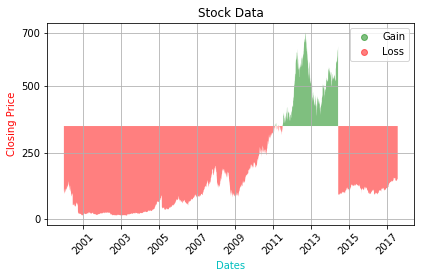

In [69]:
# Conditional fills. 
# We can do more with the conditional fills like. color different for positive and negative gain.
# We can do that by passing that value in fill_between().
def bytespdate2num(fmt, encoding = "utf-8"):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock):
    stock_price_url = "https://pythonprogramming.net/yahoo_finance_replacement"
    
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    
    stock_data = []
    split_source = source_code.split("\n")
    
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                                     delimiter = ",",
                                                                     unpack = True,                                                                 # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                                     converters = {0:bytespdate2num("%Y-%m-%d")})
    # In case we have unix time which is count of seconds from july 1970. We don't need the converters argument.
    # Instead of that we can do something like
    #dateconv = np.vectorize(dt.datetime.fromtimestamp)
    #date = dateconv(date)
    # In case we don't wants to plot the line and wants to fill the chart. We can do it using fill_between.
    plt.plot_date([],[],label = "Gain", color = "g", alpha = 0.5)
    plt.plot_date([],[],label = "Loss", color = "r", alpha = 0.5)
    plt.fill_between(date,closep, 350, where = (closep > 350), alpha = 0.5, facecolor = 'g') # alpha is used to color the shading.
    plt.fill_between(date,closep, 350, where = (closep < 350), alpha = 0.5, facecolor = 'r')
    plt.xlabel("Dates", color = "c") # Label for x axis
    plt.ylabel("Closing Price",color = "r") # Label for y axis
    plt.xticks(rotation = 45) # rotate the x axis labels
    plt.yticks([0,250,500,700])# Numbers to be shown on the Y-axis.
    plt.grid(True) #grid lines in the plot
    plt.title("Stock Data") # Chart Title
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90)
    plt.legend()
    plt.show()
    
graph_data("EBAY")

In [70]:
# there are many styles avaialble in matplotlib
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10']


## Subplots

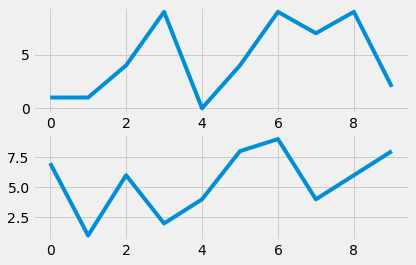

In [74]:
import random
from matplotlib import style

style.use('fivethirtyeight')
fig = plt.figure() # intializing a figure

def create_plots(): # We will create some data to plot.
    xs = []
    ys = []
    
    for i in range(10):
        x = i
        y = random.randrange(10)
        xs.append(x)
        ys.append(y)
    
    return xs, ys

# Creating subplots
ax1 = fig.add_subplot(211) # height, width, plot number.
ax2 = fig.add_subplot(212)

x,y = create_plots()
ax1.plot(x,y)

x,y = create_plots()
ax2.plot(x,y)

plt.show()

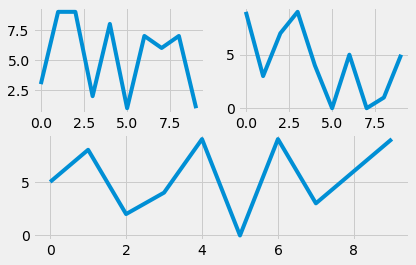

In [75]:
import random
from matplotlib import style

style.use('fivethirtyeight')
fig = plt.figure() # intializing a figure

def create_plots(): # We will create some data to plot.
    xs = []
    ys = []
    
    for i in range(10):
        x = i
        y = random.randrange(10)
        xs.append(x)
        ys.append(y)
    
    return xs, ys

# Creating subplots
ax1 = fig.add_subplot(221) # height, width, plot number.
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

x,y = create_plots()
ax1.plot(x,y)

x,y = create_plots()
ax2.plot(x,y)

x,y = create_plots()
ax3.plot(x,y)

plt.show()